In [72]:
import pandas as pd
import FinanceDataReader as fdr


In [73]:
df_kos = fdr.StockListing('KOSPI')

In [74]:
df_kos[['Marcap','Stocks']].describe()

,Marcap,Stocks
count,9.430000e+02,9.430000e+02
mean,2.030893e+12,6.717128e+07
std,1.349190e+13,2.237780e+08
min,3.039744e+09,1.098520e+05
25%,8.879330e+10,1.041226e+07
50%,2.258596e+11,2.719508e+07
75%,7.228194e+11,6.130395e+07
max,3.671416e+14,5.969783e+09


In [75]:
df_kos[df_kos['Marcap']== 3013632000]

,Code,ISU_CD,Name,Market,Dept,Close,ChangeCode,Changes,ChagesRatio,Open,High,Low,Volume,Amount,Marcap,Stocks,MarketId


In [76]:
kos_list=df_kos[(df_kos['Marcap'] ==0) | (df_kos['Marcap'] <= 8.978561e+10) |(df_kos['Stocks'] <= 1.041226e+07)] .index
df_kos.drop(kos_list,axis='index',inplace=True)


In [77]:
df_kos_code=df_kos['Code'].to_frame()


In [78]:
import pandas as pd
def make_code(x):
    x = str(x)
    return '0'*(6-len(x)) + x

KR = pd.read_html('http://kind.krx.co.kr/corpgeneral/corpList.do?method=download',header=0)[0]
KR['Code'] = KR['종목코드'].apply(make_code)
KR_list_1 = KR[KR['상장일'] < '2000-01-01']['Code'].to_frame()
KR_list_2 = KR[(KR['상장일'] >= '2000-01-01') & (KR['상장일'] < '2007-01-01')]['Code'].to_frame()
KR_list_3 = KR[(KR['상장일'] >= '2007-01-01') & (KR['상장일'] < '2015-06-15')]['Code'].to_frame()
KR_list_4 = KR[KR['상장일'] >= '2015-06-15']['Code'].to_frame()


In [79]:
df_kr_1 = pd.concat([df_kos_code,KR_list_1])
df_kr_2 = pd.concat([df_kos_code,KR_list_2])
df_kr_3 = pd.concat([df_kos_code,KR_list_3])
df_kr_4 = pd.concat([df_kos_code,KR_list_4])


In [80]:
df_kr1=df_kr_1[df_kr_1.duplicated()]
df_kr2=df_kr_2[df_kr_2.duplicated()]
df_kr3=df_kr_3[df_kr_3.duplicated()]
df_kr4=df_kr_4[df_kr_4.duplicated()]

In [81]:
kr1=[]
kr2=[]
kr3=[]
kr4=[]

In [82]:
from tqdm import tqdm
import time


for i in range(len(df_kr1)):
    df=pd.DataFrame
    kr1.append(df)

for i in range(len(df_kr2)):
    df=pd.DataFrame
    kr2.append(df) 

for i in range(len(df_kr3)):
    df=pd.DataFrame
    kr3.append(df)  

for i in range(len(df_kr4)):
    df=pd.DataFrame
    kr4.append(df)     


In [83]:
for i in range(len(df_kr1)):
    kr1[i] = fdr.DataReader(df_kr1.iat[i,0],'1980')
    kr1[i]['Code'] =df_kr1.iat[i,0]



In [84]:
for i in range(len(df_kr2)):
    kr2[i] = fdr.DataReader(df_kr2.iat[i,0],'2000')
    kr2[i]['Code'] =df_kr2.iat[i,0]

In [85]:
for i in range(len(df_kr3)):
    kr3[i] = fdr.DataReader(df_kr3.iat[i,0],'2007')
    kr3[i]['Code'] =df_kr3.iat[i,0]
    

In [86]:
for i in range(len(df_kr4)):
    kr4[i] = fdr.DataReader(df_kr4.iat[i,0],'2015-6-15')
    kr4[i]['Code'] =df_kr4.iat[i,0]

In [87]:
df_Kr1 = pd.DataFrame(kr1) ## 2000년 이전 상장기업 1980년도부터 주가데이터
df_Kr2 = pd.DataFrame(kr2) ## 2000년~2007년 상장기업 2000년부터 주가데이터
df_Kr3 = pd.DataFrame(kr3) ## 2007년~2015년 상장기업 2007년부터 주가데이터
df_Kr4 = pd.DataFrame(kr4) ## 2015년~ 상장기업 2015년부터 주가데이터


c:\Users\jhm21\AppData\Local\Programs\Python\Python311\Lib\site-packages\pandas\core\internals\construction.py:568: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  values = np.array([convert(v) for v in values])


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

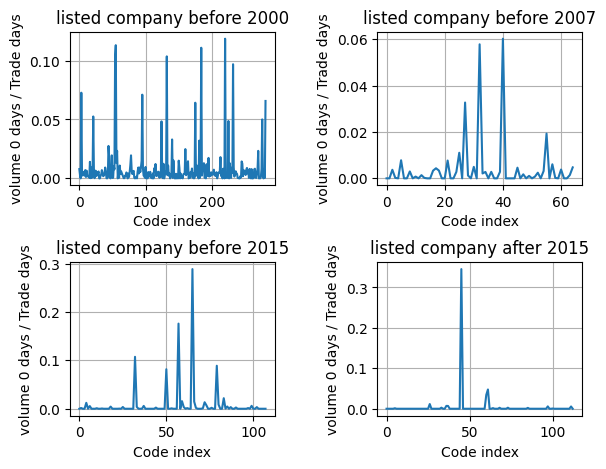

In [89]:
kr_ft_V_1 =[]
kr_ft_V_2 =[]
kr_ft_V_3 =[]
kr_ft_V_4 = []
kr_ft_V =[]
for i in range(len(df_kr1)):
    kr_ft_V_1.append((len(kr1[i][kr1[i]['Volume']==0])/len(kr1[i])))

kr_ft_V_1=pd.DataFrame(kr_ft_V_1)

for i in range(len(df_kr2)):
    kr_ft_V_2.append((len(kr2[i][kr2[i]['Volume']==0])/len(kr2[i])))
    
kr_ft_V_2 = pd.DataFrame(kr_ft_V_2)    
for i in range(len(df_kr3)):
    kr_ft_V_3.append((len(kr3[i][kr3[i]['Volume']==0])/len(kr3[i])))
kr_ft_V_3 = pd.DataFrame(kr_ft_V_3)    

for i in range(len(df_kr4)):
    kr_ft_V_4.append((len(kr4[i][kr4[i]['Volume']==0])/len(kr4[i])))
kr_ft_V_4 = pd.DataFrame(kr_ft_V_4)  

kr_ft_V = pd.concat([kr_ft_V_1,kr_ft_V_2,kr_ft_V_3,kr_ft_V_4])
kr_ft_V_d = pd.concat([kr_ft_V_1,kr_ft_V_2,kr_ft_V_3,kr_ft_V_4],axis=1)
kr_ft_V=kr_ft_V.reset_index().iloc[:,[1]]
plt.subplot(2, 2, 1)
plt.plot(kr_ft_V_1)
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 2)  
plt.plot(kr_ft_V_2)
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 3)  
plt.plot(kr_ft_V_3)
plt.title('listed company before 2015')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplot(2, 2, 4)  
plt.plot(kr_ft_V_4)
plt.title('listed company after 2015')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=0.5)
plt.show()

In [90]:
kr_ft_V_d.describe()

,0,0,0,0
count,282.000000,65.000000,108.000000,113.000000
mean,0.008454,0.004089,0.008311,0.004222
std,0.018120,0.011034,0.035477,0.032865
min,0.000000,0.000000,0.000000,0.000000
25%,0.000506,0.000000,0.000000,0.000000
50%,0.003667,0.000179,0.000000,0.000000
75%,0.007458,0.003163,0.001484,0.000000
max,0.118500,0.060163,0.288779,0.345282


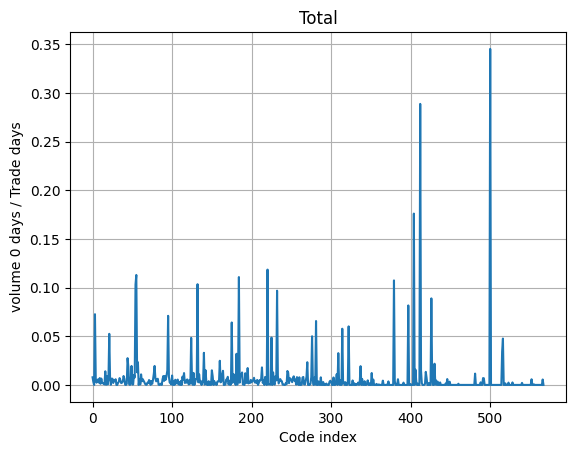

In [91]:
plt.plot(kr_ft_V)
plt.title('Total')
plt.xlabel('Code index')
plt.ylabel('volume 0 days / Trade days')
plt.grid()
plt.show()


In [92]:
## 상장 기업별 특이값제거 
index1 = kr_ft_V_1[kr_ft_V_1[0]>= 0.04].index
index2 = kr_ft_V_2[kr_ft_V_2[0] >= 0.018].index
index3 = kr_ft_V_3[kr_ft_V_3[0]>= 0.05].index
index4 = kr_ft_V_4[kr_ft_V_4[0]>= 0.03].index


In [93]:
df_Kr1.drop(index1 ,axis='index', inplace=True)
df_Kr2.drop(index2 ,axis='index', inplace=True)
df_Kr3.drop(index3 ,axis='index', inplace=True)
df_Kr4.drop(index4 ,axis='index', inplace=True) 

In [94]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)
df_Kr3.reset_index(drop=True,inplace=True)
df_Kr4.reset_index(drop=True,inplace=True)

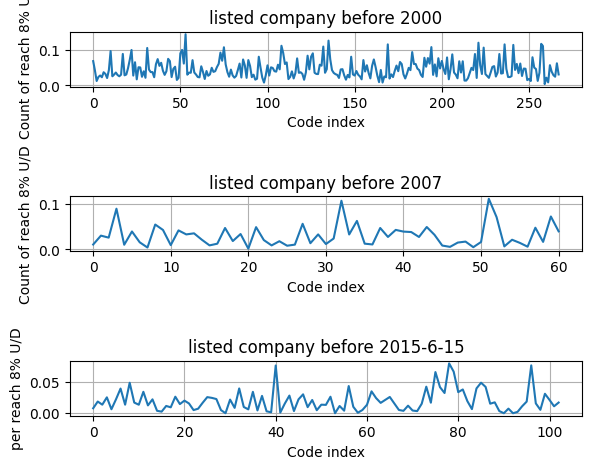

In [95]:
kr_ft_15_TB_1 =[]
kr_ft_15_TB_2 =[]
kr_ft_15_TB_3 =[]
kr_ft_15_TB =[]

for i in range(len(df_Kr1)):
    kr_ft_15_TB_1.append(len(df_Kr1[0][i].loc[:'2015-6-15'][(df_Kr1[0][i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr1[0][i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr1[0][i].loc[:'2015-6-15']))

for i in range(len(df_Kr2)):
    kr_ft_15_TB_2.append(len(df_Kr2[0][i].loc[:'2015-6-15'][(df_Kr2[0][i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr2[0][i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr2[0][i].loc[:'2015-6-15']))

for i in range(len(df_Kr3)):
    kr_ft_15_TB_3.append(len(df_Kr3[0][i].loc[:'2015-6-15'][(df_Kr3[0][i].loc[:'2015-6-15']['Change']>0.08) | (df_Kr3[0][i].loc[:'2015-6-15']['Change']< -0.08)])/len(df_Kr3[0][i].loc[:'2015-6-15']))

kr_ft_15_TB = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)])
kr_ft_15_TB_d = pd.concat([pd.DataFrame(kr_ft_15_TB_1),pd.DataFrame(kr_ft_15_TB_2),pd.DataFrame(kr_ft_15_TB_3)],axis=1)
plt.subplot(3, 1, 1)  
plt.plot(pd.DataFrame(kr_ft_15_TB_1))
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('Count of reach 8% U/D')
plt.grid()

plt.subplot(3, 1, 2)  
plt.plot(pd.DataFrame(kr_ft_15_TB_2))
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('Count of reach 8% U/D')
plt.grid()

plt.subplot(3, 1, 3)  
plt.plot(pd.DataFrame(kr_ft_15_TB_3))
plt.title('listed company before 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('per reach 8% U/D')
plt.grid()

plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=2)
plt.show()
    


In [96]:
kr_ft_15_TB_1=pd.DataFrame(kr_ft_15_TB_1)
kr_ft_15_TB_2=pd.DataFrame(kr_ft_15_TB_2)
kr_ft_15_TB_3=pd.DataFrame(kr_ft_15_TB_3)

In [97]:
kr_ft_15_TB_d.describe()

,0,0,0
count,268.000000,61.000000,103.000000
mean,0.045640,0.030123,0.019470
std,0.025683,0.023992,0.017046
min,0.003868,0.001744,0.000000
25%,0.027230,0.011830,0.006389
50%,0.038621,0.023869,0.015385
75%,0.058784,0.041623,0.025886
max,0.142544,0.110643,0.078810


In [98]:
index5 = kr_ft_15_TB_1[kr_ft_15_TB_1[0]> 0.09].index
index6 = kr_ft_15_TB_2[kr_ft_15_TB_2[0] >0.09].index


In [99]:
df_Kr1.drop(index5 ,axis='index', inplace=True)
df_Kr2.drop(index6 ,axis='index', inplace=True)


In [100]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)


<Axes: >

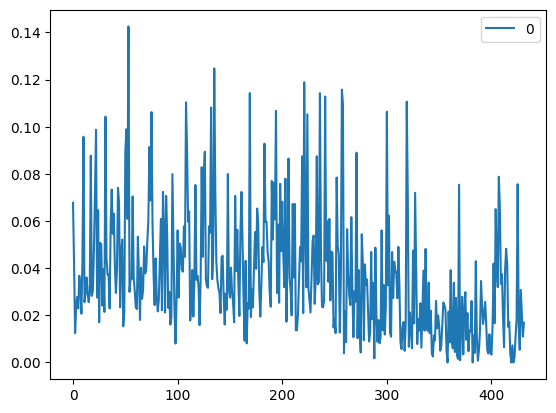

In [101]:
kr_ft_15_TB=kr_ft_15_TB.reset_index().iloc[:,[1]]
kr_ft_15_TB.plot()

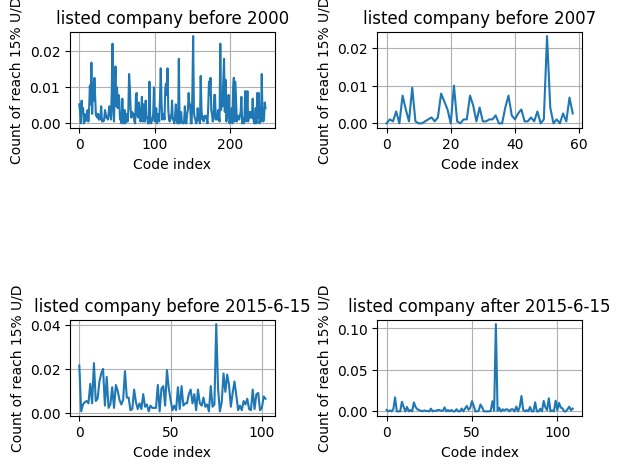

In [102]:
kr_ft_23_TB_1 =[]
kr_ft_23_TB_2 =[]
kr_ft_23_TB_3 =[]
kr_ft_23_TB_4=[]
kr_ft_23_TB = []

for i in range(len(df_Kr1)):
    kr_ft_23_TB_1.append(len(df_Kr1[0][i].loc['2015-6-15':][(df_Kr1[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr1[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr1[0][i].loc['2015-6-15':]))

for i in range(len(df_Kr2)):
    kr_ft_23_TB_2.append(len(df_Kr2[0][i].loc['2015-6-15':][(df_Kr2[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr2[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr2[0][i].loc['2015-6-15':]))

for i in range(len(df_Kr3)):
    kr_ft_23_TB_3.append(len(df_Kr3[0][i].loc['2015-6-15':][(df_Kr3[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr3[0][i].loc['2015-6-15':]['Change']< -0.08)])/len(df_Kr3[0][i].loc['2015-6-15':]))


for i in range(len(df_Kr4)):
    kr_ft_23_TB_4.append(len(df_Kr4[0][i].loc['2015-6-15':][(df_Kr4[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr4[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr4[0][i].loc['2015-6-15':]))

kr_ft_23_TB = pd.concat([pd.DataFrame(kr_ft_23_TB_1),pd.DataFrame(kr_ft_23_TB_2),pd.DataFrame(kr_ft_23_TB_3),pd.DataFrame(kr_ft_23_TB_4)])
kr_ft_23_TB_d = pd.concat([pd.DataFrame(kr_ft_23_TB_1),pd.DataFrame(kr_ft_23_TB_2),pd.DataFrame(kr_ft_23_TB_3),pd.DataFrame(kr_ft_23_TB_4)],axis=1)

plt.subplot(2, 2, 1)  
plt.plot(pd.DataFrame(kr_ft_23_TB_1))
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 2)  
plt.plot(pd.DataFrame(kr_ft_23_TB_2))
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 3)  
plt.plot(pd.DataFrame(kr_ft_23_TB_3))
plt.title('listed company before 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 4)  
plt.plot(pd.DataFrame(kr_ft_23_TB_4))
plt.title('listed company after 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=2)
plt.show()
    



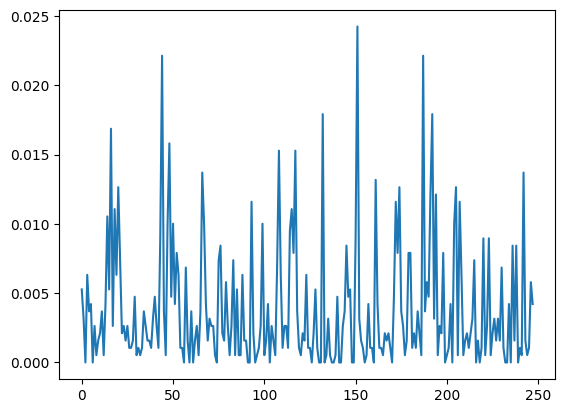

In [103]:
plt.plot(kr_ft_23_TB_1)

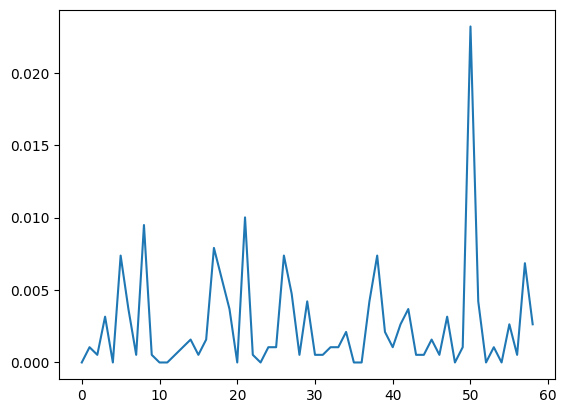

In [104]:
plt.plot(kr_ft_23_TB_2)

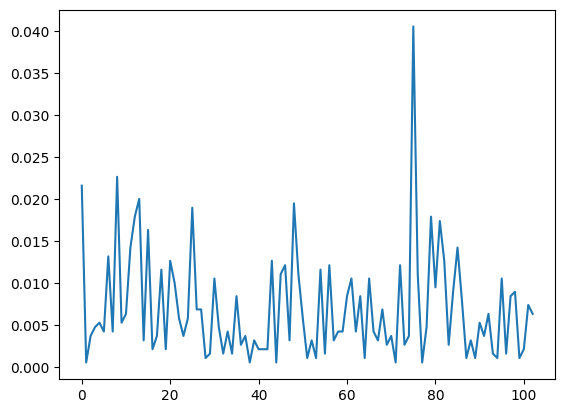

In [105]:
plt.plot(kr_ft_23_TB_3)

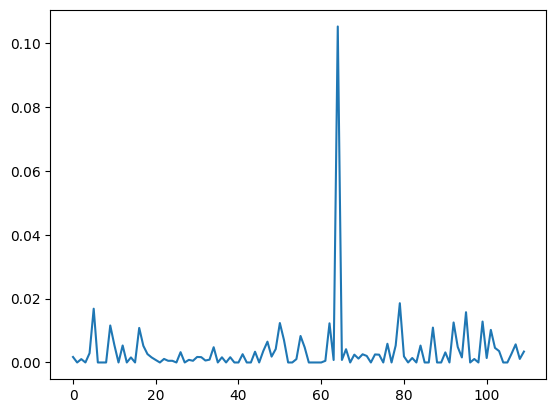

In [106]:
plt.plot(kr_ft_23_TB_4)

In [107]:
df_Kr3[0][75]

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2007-11-01,64396,68703,54757,54758,398795,NaN,093230
2007-11-02,52911,60705,52296,54347,151375,-0.007506,093230
2007-11-05,57013,60089,54552,57629,61036,0.060390,093230
2007-11-06,57218,59884,56398,57014,44941,-0.010672,093230
2007-11-07,57423,57628,53937,54553,34641,-0.043165,093230
...,...,...,...,...,...,...,...
2023-02-20,889,889,870,879,255479,0.001139,093230
2023-02-21,872,885,871,875,251321,-0.004551,093230
2023-02-22,874,874,851,852,434689,-0.026286,093230


In [108]:
kr_ft_23_TB_1=pd.DataFrame(kr_ft_23_TB_1)
kr_ft_23_TB_2=pd.DataFrame(kr_ft_23_TB_2)
kr_ft_23_TB_3=pd.DataFrame(kr_ft_23_TB_3)
kr_ft_23_TB_4=pd.DataFrame(kr_ft_23_TB_4)

In [109]:
df_Kr4[0][63]

,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2017-12-05,28450,29350,21750,22700,1390347,NaN,281820
2017-12-06,22800,24600,22500,23200,412734,0.022026,281820
2017-12-07,23150,24400,22600,24400,190904,0.051724,281820
2017-12-08,24200,24300,22600,23000,174607,-0.057377,281820
2017-12-11,22500,23100,21750,22000,177474,-0.043478,281820
...,...,...,...,...,...,...,...
2023-02-20,18160,18400,17950,18350,15726,0.003829,281820
2023-02-21,18350,18350,17870,17990,26293,-0.019619,281820
2023-02-22,17500,17850,17500,17800,14289,-0.010561,281820


In [110]:
kr_ft_23_TB_d.describe()

,0,0,0,0
count,248.000000,59.000000,103.000000,110.000000
mean,0.003869,0.002600,0.007012,0.003760
std,0.004456,0.003768,0.006367,0.010566
min,0.000000,0.000000,0.000527,0.000000
25%,0.001054,0.000527,0.002636,0.000000
50%,0.002109,0.001054,0.004744,0.001309
75%,0.005271,0.003690,0.010543,0.004017
max,0.024249,0.023195,0.040590,0.105263


In [111]:
index7 = kr_ft_23_TB_1[kr_ft_23_TB_1[0]> 0.01].index
index8 = kr_ft_23_TB_2[kr_ft_23_TB_2[0] >0.005].index
index9 = kr_ft_23_TB_3[kr_ft_23_TB_3[0]> 0.01].index
index10 = kr_ft_23_TB_4[kr_ft_23_TB_4[0] >0.015].index


In [112]:
df_Kr1.drop(index7 ,axis='index', inplace=True)
df_Kr2.drop(index8 ,axis='index', inplace=True)
df_Kr3.drop(index9 ,axis='index', inplace=True)
df_Kr4.drop(index10 ,axis='index', inplace=True) 

In [113]:
df_Kr1.reset_index(drop=True,inplace=True)
df_Kr2.reset_index(drop=True,inplace=True)
df_Kr3.reset_index(drop=True,inplace=True)
df_Kr4.reset_index(drop=True,inplace=True)

In [120]:
kr_ft_Open =[]


for i in range(len(df_Kr1)):
    kr_ft_23_TB_1.append(len(df_Kr1[0][i].loc['2015-6-15':][(df_Kr1[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr1[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr1[0][i].loc['2015-6-15':]))

for i in range(len(df_Kr2)):
    kr_ft_23_TB_2.append(len(df_Kr2[0][i].loc['2015-6-15':][(df_Kr2[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr2[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr2[0][i].loc['2015-6-15':]))

for i in range(len(df_Kr3)):
    kr_ft_23_TB_3.append(len(df_Kr3[0][i].loc['2015-6-15':][(df_Kr3[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr3[0][i].loc['2015-6-15':]['Change']< -0.08)])/len(df_Kr3[0][i].loc['2015-6-15':]))


for i in range(len(df_Kr4)):
    kr_ft_23_TB_4.append(len(df_Kr4[0][i].loc['2015-6-15':][(df_Kr4[0][i].loc['2015-6-15':]['Change']>0.15) | (df_Kr4[0][i].loc['2015-6-15':]['Change']< -0.15)])/len(df_Kr4[0][i].loc['2015-6-15':]))

kr_ft_23_TB = pd.concat([pd.DataFrame(kr_ft_23_TB_1),pd.DataFrame(kr_ft_23_TB_2),pd.DataFrame(kr_ft_23_TB_3),pd.DataFrame(kr_ft_23_TB_4)])
kr_ft_23_TB_d = pd.concat([pd.DataFrame(kr_ft_23_TB_1),pd.DataFrame(kr_ft_23_TB_2),pd.DataFrame(kr_ft_23_TB_3),pd.DataFrame(kr_ft_23_TB_4)],axis=1)

plt.subplot(2, 2, 1)  
plt.plot(pd.DataFrame(kr_ft_23_TB_1))
plt.title('listed company before 2000')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 2)  
plt.plot(pd.DataFrame(kr_ft_23_TB_2))
plt.title('listed company before 2007')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 3)  
plt.plot(pd.DataFrame(kr_ft_23_TB_3))
plt.title('listed company before 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()

plt.subplot(2, 2, 4)  
plt.plot(pd.DataFrame(kr_ft_23_TB_4))
plt.title('listed company after 2015-6-15')
plt.xlabel('Code index')
plt.ylabel('Count of reach 15% U/D')
plt.grid()
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.5, hspace=2)
plt.show()
    


,Open,High,Low,Close,Volume,Change,Code
Date,,,,,,,
2018-06-12,70095,72228,63141,70096,3485779,NaN,294870
2018-06-14,66665,68056,62214,65367,1164317,-0.067465,294870
2018-06-15,64718,65830,61194,61473,573753,-0.059571,294870
2018-06-18,61102,61658,55538,56559,854098,-0.079938,294870
2018-06-19,56373,56929,50995,50996,968919,-0.098357,294870
...,...,...,...,...,...,...,...
2023-02-20,10450,10780,10430,10770,206630,0.030622,294870
2023-02-21,10770,11190,10710,10990,568453,0.020427,294870
2023-02-22,10800,10890,10680,10730,164190,-0.023658,294870


In [114]:
xs=[]
ys=[]
for i in range(9):
    X = dfxs[i].values.tolist()
    y = dfys[i].values.tolist()
    xs.append(X)
    ys.append(y)


NameError: name 'dfxs' is not defined

In [ ]:
window_size = 10

Xx = []
Yy =[] 
 
for i in range(9):
    linex = [] 
    liney = []
    X=xs[i]
    Y=ys[i]
    b=len(ys[i])
    for j in range(b-window_size):
         
        _X = X[j : j + window_size] 
        _y = Y[j + window_size]   
        linex.append(_X)
        liney.append(_y)  
    
    Xx.append(linex)
    Yy.append(liney)
Yy

In [ ]:
train_X=[]
train_y=[]
test_X=[]
test_y=[]

for i in range(len(list_kr_0)):
    train_size = int(len(Yy[i]) * 0.7)
    train_X.append(np.array(Xx[i][0 : train_size]))
    train_y.append(np.array(Yy[i][0 : train_size]))
    test_size = len(Xx[i]) - train_size
    test_X.append(np.array(Xx[i][train_size : len(Xx[i])]))
    test_y.append(np.array(Yy[i][train_size : len(Yy[i])]))
train_y